In [62]:
import pandas
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [54]:
teste = pandas.read_csv("nba_teste.csv")
treino = pandas.read_csv("nba_treino.csv")
# Assuming you have your training data and labels stored in `treino` dataframe
X_train = treino.iterrows()
y_train = treino['TARGET_5Yrs'].values

# Assuming you have your test data and labels stored in `teste` dataframe
X_test = teste.iterrows()
y_test = teste['TARGET_5Yrs'].values

In [55]:
def k_nearest_neighbors(train, y_train, test_point, k):
    distances = np.sqrt(np.sum((train[:, :-1] - test_point[:-1])**2, axis=1))
    sorted_indices = distances.argsort()[:k]
    count_1 = 0
    count_0 = 0

    for indice in sorted_indices:
        if train[indice, -1] == 1:
            count_1 += 1
        elif train[indice, -1] == 0:
            count_0 += 1

    if count_1 > count_0:
        query_label = 1
    else:
        query_label = 0
    
    return query_label


In [56]:
def calculate_classification_metrics(confusion_matrix):

    true_negative, false_positive, false_negative, true_positive = confusion_matrix
    accuracy = (true_positive + true_negative) / (true_negative + false_positive + false_negative + true_positive)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1


In [57]:
def calculate_confusion_matrix(y_true, y_pred):
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    for i in range(len(y_pred)):
        if y_true[i] == 1 and y_pred[i] == 1:
            true_positive += 1
        elif y_true[i] == 0 and y_pred[i] == 0:
            true_negative += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            false_positive += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            false_negative += 1
    
    confusion_matrix = true_negative, false_positive, false_negative, true_positive
    return confusion_matrix


In [58]:
teste = pandas.read_csv("nba_teste.csv")
treino = pandas.read_csv("nba_treino.csv")
# Assuming you have your training data and labels stored in `treino` dataframe
X_train = treino.iterrows()
y_train = treino['TARGET_5Yrs'].values

# Assuming you have your test data and labels stored in `teste` dataframe
X_test = teste.iterrows()
y_test = teste['TARGET_5Yrs'].values

k_values = [2, 10, 50, 150]

for k in k_values:
    y_pred_k = np.zeros(teste.shape[0])
    j = 0
    for id, row in teste.iterrows():
        point = row.values
        y_pred_k[j] = k_nearest_neighbors(treino.values, y_train, point, k)
        j+=1
    confusion_matrices = calculate_confusion_matrix(y_train, y_pred_k)
    accuracy, precision, recall, f1 = calculate_classification_metrics(confusion_matrices)

    print("K:", k)
    print("Accuracies:", accuracy)
    print("Precisions:", precision)
    print("Recalls:", recall)
    print("F1 Scores:", f1)
    print()


K: 2
Accuracies: 0.48507462686567165
Precisions: 0.5742574257425742
Recalls: 0.3790849673202614
F1 Scores: 0.4566929133858268

K: 10
Accuracies: 0.4925373134328358
Precisions: 0.5555555555555556
Recalls: 0.5555555555555556
F1 Scores: 0.5555555555555556

K: 50
Accuracies: 0.503731343283582
Precisions: 0.5581395348837209
Recalls: 0.6274509803921569
F1 Scores: 0.5907692307692307

K: 150
Accuracies: 0.5111940298507462
Precisions: 0.563953488372093
Recalls: 0.6339869281045751
F1 Scores: 0.5969230769230769



In [59]:
teste = pandas.read_csv("nba_teste.csv")
treino = pandas.read_csv("nba_treino.csv")


train_X = treino.drop(['TARGET_5Yrs'], axis=1)
test_X = teste.drop(['TARGET_5Yrs'], axis=1)

train_y = treino['TARGET_5Yrs']
test_y = teste['TARGET_5Yrs']

X_train = np.array([row for _, row in train_X.iterrows()])
X_test = np.array([row for _, row in test_X.iterrows()])

def knn(X_train, y_train, X_test, k):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    return y_pred

for k in [2, 10, 50, 150]:
    y_pred = knn(X_train, y_train, X_test, k)
    confusion_matrices = calculate_confusion_matrix(y_train, y_pred_k)
    accuracy, precision, recall, f1 = calculate_classification_metrics(confusion_matrices)
    print("K:", k)
    print("Accuracies:", accuracy)
    print("Precisions:", precision)
    print("Recalls:", recall)
    print("F1 Scores:", f1)
    print()

K: 2
Accuracies: 0.5111940298507462
Precisions: 0.563953488372093
Recalls: 0.6339869281045751
F1 Scores: 0.5969230769230769

K: 10
Accuracies: 0.5111940298507462
Precisions: 0.563953488372093
Recalls: 0.6339869281045751
F1 Scores: 0.5969230769230769

K: 50
Accuracies: 0.5111940298507462
Precisions: 0.563953488372093
Recalls: 0.6339869281045751
F1 Scores: 0.5969230769230769

K: 150
Accuracies: 0.5111940298507462
Precisions: 0.563953488372093
Recalls: 0.6339869281045751
F1 Scores: 0.5969230769230769



In [60]:
def k_means(X, k, max_iterations=100):
    # Initialize centroids randomly
    #centroids = X[:,:-1][np.random.randint(X[:,:-1].shape[0], size=k)]
    centroids = X[:,:-1][np.random.choice(X[:,:-1].shape[0], k, replace=False)]
    labels = None

    for _ in range(max_iterations):
        # Assign samples to the nearest centroid
        distances = np.sqrt(np.sum((X[:, :-1][:, np.newaxis] - centroids)**2, axis=2))
        #distances = np.linalg.norm(X[:, np.newaxis, :-1] - centroids, axis=-1)
        current_labels = np.argmin(distances, axis=-1)

        # Update centroids
        new_centroids = np.empty((k, X.shape[1]-1))

        for i in range(k):
            new_centroids[i] = X[current_labels == i, :-1].mean(axis=0)

        # Check for convergence
        if labels is not None and np.all(labels == current_labels):
            break

        centroids = new_centroids
        labels = current_labels
    
    clusters = [X[current_labels == i] for i in range(k)]

    return centroids, clusters

k_values = [2, 3]

# Assuming you have your data stored in `treino` dataframe

for k in k_values:
    centroids, clusters = k_means(treino.values, k)

print("Centroids:", centroids)
for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {cluster}")


Centroids: [[7.22033097e+01 2.28900709e+01 9.36028369e+00 3.57683215e+00
  8.12907801e+00 4.36877069e+01 4.85815603e-01 1.44326241e+00
  3.12553191e+01 1.72671395e+00 2.29172577e+00 7.53252955e+01
  1.02529551e+00 2.37234043e+00 3.39527187e+00 2.36288416e+00
  8.45626478e-01 3.58156028e-01 1.56075650e+00]
 [3.92462462e+01 1.14912913e+01 3.93633634e+00 1.50720721e+00
  3.68438438e+00 4.06636637e+01 2.03903904e-01 6.87087087e-01
  2.13774775e+01 7.21921922e-01 1.03753754e+00 6.83951952e+01
  5.77177177e-01 1.18228228e+00 1.75675676e+00 9.81081081e-01
  4.06006006e-01 1.78678679e-01 7.66366366e-01]
 [6.64050633e+01 1.74674051e+01 6.70348101e+00 2.65917722e+00
  5.44398734e+00 4.84984177e+01 9.49367089e-04 5.09493671e-02
  1.16708861e+00 1.38196203e+00 2.08037975e+00 6.61528481e+01
  1.47183544e+00 2.56962025e+00 4.04651899e+00 1.02468354e+00
  5.40822785e-01 5.92088608e-01 1.16582278e+00]]
Cluster 0: [[74.  15.3  5.2 ...  0.3  1.   0. ]
 [75.  11.4  3.7 ...  0.   0.7  0. ]
 [62.  10.9  6.

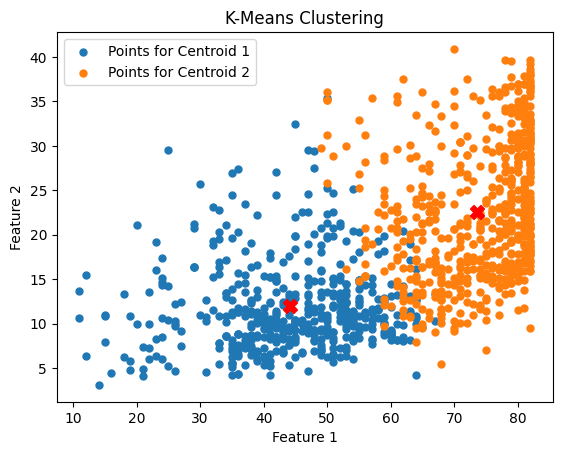

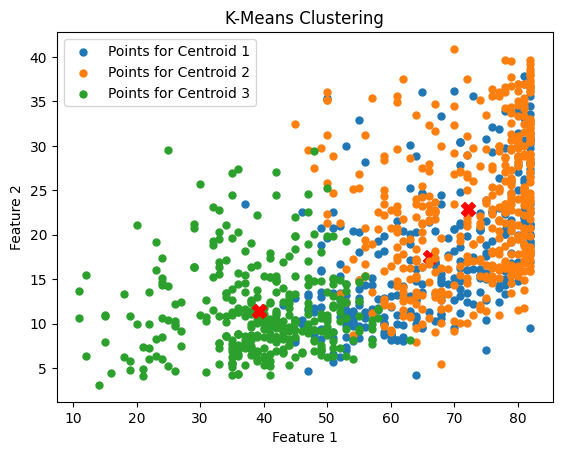

In [61]:
def plot_clusters(centroids, clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for i, cluster in enumerate(clusters):
        # Plotting the points in the cluster
        plt.scatter(cluster[:, 0], cluster[:, 1], s=25, label=f'Points for Centroid {i+1}')

        # Plotting the centroid of the cluster
        plt.scatter(centroids[i, 0], centroids[i, 1], c='red', s=100, marker='X')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

centroids, clusters = k_means(treino.values, 2)
plot_clusters(centroids, clusters)

centroids, clusters = k_means(treino.values, 3)
plot_clusters(centroids, clusters)

In [ ]:
from sklearn.cluster import KMeans

def k_means(X, k, max_iterations=100):
    kmeans_model = KMeans(n_clusters=k, max_iter=max_iterations)
    kmeans_model.fit(X)
    centroids = kmeans_model.cluster_centers_
    labels = kmeans_model.labels_
    clusters = [X[labels == i] for i in range(k)]
    
    return centroids, clusters
